In [77]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

# %matplotlib notebook

import sys

sys.path.append("../incl/")

import ELPH_utils
import ELPH_dyn
import ELPH_Dim_Reducer

from RedDimApprox import RedDimApprox

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
example_run = ELPH_utils.load_runs(filename='/home/agluedge/Preprints/ELPH/example_run.npz')[0]
print(example_run.shape)

runs = ELPH_utils.load_runs(filename='/home/agluedge/Preprints/ELPH/runs/runs_n_kmax=200.npz')

n_runs = len(runs)
n_kmax = runs[0].shape[0]

print(n_runs, 'loaded with n_kmax =', n_kmax)

(200, 400)
1000 loaded with n_kmax = 200


In [79]:
dim_reducer = ELPH_Dim_Reducer.SVD()

model = RedDimApprox(runs, dim_reducer)
model.train()

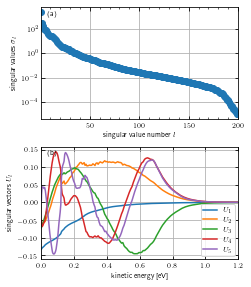

In [55]:
kmax = 4.
n_kmax = 200

E_el = ELPH_dyn.electron_dispersion(np.linspace(0,kmax,n_kmax,endpoint=True),0)



####################################################
####################################################
####################################################

from matplotlib import rc
rc('text', usetex=True)

from matplotlib import gridspec
import matplotlib.ticker as ticker

fs = 7
fig = plt.figure(figsize=(3.5,4))
plt.rcParams.update({'font.size': fs})
gs = gridspec.GridSpec(nrows=2, ncols=1, width_ratios=[1], height_ratios=[1,1])


####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[0,0])

plt.grid(0.5)
plt.semilogy(np.arange(1,200.5,1),dim_reducer.S,'o')

plt.xlim(1,200)
# plt.ylim(0,1)

# plt.title('singular values')
plt.xlabel(r'singular value number $l$')
plt.ylabel(r'singular values $\sigma_l$')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(10))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

# ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
# ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.04))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(a)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)

####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[1,0])

plt.grid(0.5)

rdim = 5
for l in range(rdim):
    plt.plot(E_el,dim_reducer.U[:,l],  label=r'$U_'+str(l+1)+'$')
# plt.title('first ' + str(rdim) + ' singular')

plt.legend()

plt.xlim(0,1.2)
# plt.ylim(0,1)


plt.xlabel(r'kinetic energy [eV]')
plt.ylabel(r'singular vectors $U_l$')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

# ax00.xaxis.set_major_locator(ticker.MultipleLocator(50))
# ax00.xaxis.set_minor_locator(ticker.MultipleLocator(10))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

# ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
# ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.04))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(b)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)

####################################################
####################################################
####################################################



plt.tight_layout()

plt.savefig('/home/agluedge/Preprints/ELPH/figs/SVD.pdf')
plt.show()

In [81]:
pred = model.approx_single_run(example_run, rdim=20)

print(model.get_error(example_run, pred, rdim=10, norm='max'))


0.09517082553297851


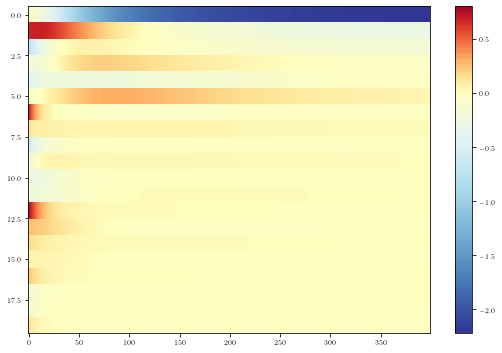

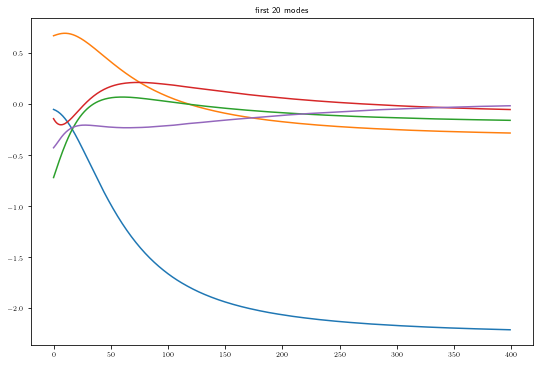

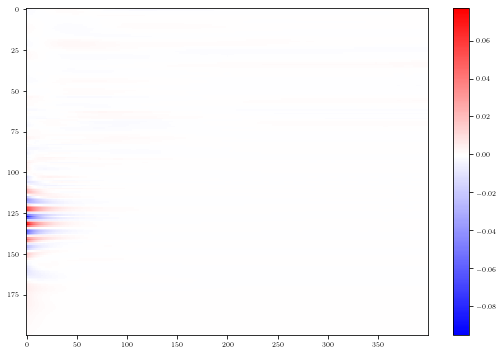

In [68]:
rdim = 20

red = dim_reducer.reduce(example_run, rdim=rdim)

# red = red[:10]

import matplotlib.colors as colors
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, vcenter=None, clip=False):
        self.vcenter = vcenter
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=False):
        """
        Map value to the interval [0, 1]. The clip argument is unused.
        """
        result, is_scalar = self.process_value(value)
        self.autoscale_None(result)  # sets self.vmin, self.vmax if None

        if not self.vmin <= self.vcenter <= self.vmax:
            raise ValueError("vmin, vcenter, vmax must increase monotonically")
        result = np.ma.masked_array(
            np.interp(result, [self.vmin, self.vcenter, self.vmax],
                      [0, 0.5, 1.]), mask=np.ma.getmask(result))
        if is_scalar:
            result = np.atleast_1d(result)[0]
        return result


vmin = red.min()
vmax = red.max()
        
midnorm = MidpointNormalize(vmin=vmin, vcenter=0.0, vmax=vmax)

# plt.imshow(red, aspect='auto', interpolation='none')
plt.imshow(red, aspect='auto', interpolation='none', norm=midnorm, cmap='RdYlBu_r')
plt.colorbar()
plt.show()


for l in range(5):
    plt.plot(red[l],  label='mode '+str(l))
plt.title('first ' + str(rdim) + ' modes')
plt.show()




err = pred-example_run

vmin = err.min()
vmax = err.max()
        
midnorm = MidpointNormalize(vmin=vmin, vcenter=0.0, vmax=vmax)

# plt.imshow(red, aspect='auto', interpolation='none')
plt.imshow(err, aspect='auto', interpolation='none', norm=midnorm, cmap='bwr')
plt.colorbar()
plt.show()


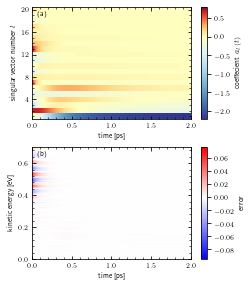

In [76]:
####################################################
####################################################
####################################################

from matplotlib import rc
rc('text', usetex=True)

from matplotlib import gridspec
import matplotlib.ticker as ticker

fs = 7
fig = plt.figure(figsize=(3.5,4))
plt.rcParams.update({'font.size': fs})
gs = gridspec.GridSpec(nrows=2, ncols=1, width_ratios=[1], height_ratios=[1,1])


####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[0,0])


extent = [0,2,0.5,red.shape[0]+0.5]


vmin = red.min()
vmax = red.max()
        
midnorm = MidpointNormalize(vmin=vmin, vcenter=0.0, vmax=vmax)

# plt.imshow(red, aspect='auto', interpolation='none')
plt.imshow(red, aspect='auto', interpolation='none', norm=midnorm, cmap='RdYlBu_r', extent=extent, origin='lower')
cbar = plt.colorbar()
cbar.set_label(r'coeffecient $a_l(t)$')

# plt.xlim(1,200)
plt.ylim(0.5,red.shape[0]+0.5)

# plt.title('singular values')
plt.xlabel(r'time [ps]')
plt.ylabel(r'singular vector number $l$')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(4))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(1))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(a)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes, rasterized=True)

####################################################
####################################################
####################################################

t = np.linspace(0,2,err.shape[1])

ax00 = plt.subplot(gs[1,0])

vmin = err.min()
vmax = err.max()
        
midnorm = MidpointNormalize(vmin=vmin, vcenter=0.0, vmax=vmax)

# plt.imshow(red, aspect='auto', interpolation='none')
plt.pcolormesh(t,E_el,err,norm=midnorm, cmap='bwr', shading='auto', rasterized=True)
cbar = plt.colorbar()
cbar.set_label(r'error')

# plt.xlim(0,1.2)
plt.ylim(0,0.7)


plt.xlabel(r'time [ps]')
plt.ylabel(r'kinetic energy [eV]')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.04))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(b)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)

####################################################
####################################################
####################################################



plt.tight_layout()

plt.savefig('/home/agluedge/Preprints/ELPH/figs/SVD_dyn_compression.pdf', dpi=600)
plt.show()